# Домашнее задание 2: библиотека Numpy и линейная алгебра


Импортируем библиотеки:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

from scipy import misc 

%matplotlib inline

*Вопросы для самопроверки:*
1. Что такое NumPy?
2. Зачем используется и почему работает быстрее?
3. Что такое линейная алгебра?
4. Как она связана с машинным обучением и глубоким обучением?

### Задание 1

В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета numpy и с ним.

In [3]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((100,1000))
b = np.random.sample((1000,100))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
print(a.ndim)
print(b.ndim)
# Используйте функцию shape, что она вывела?
# ========
print(a.shape)
print(b.shape)
# тут можно писать код 
# ========
# print(a)
# print(b)

2
2
(100, 1000)
(1000, 100)


In [4]:
def mult(a, b):
    # здесь напишите перемножение матриц без 
    # использования NumPy и выведите результат 
    row_a, col_a = a.shape
    row_b, col_b = b.shape
    if col_a != row_b:
        raise Exception('Error dimensions')
    mat = np.zeros((row_a, col_b), dtype=np.float64)
    for i in range(row_a):
        for j in range(col_b):
            for k in range(col_a):
                mat[i, j] += a[i, k] * b[k, j]
    # print(mat)
    return mat

In [5]:
def np_mult(a, b):
    # здесь напишите перемножение матриц с
    # использованием NumPy и выведите результат
    res = np.dot(a, b)
    # print(res)
    return res
    

In [6]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

Wall time: 5.71 s


array([[253.81116033, 248.60431376, 256.77127752, ..., 253.57900833,
        255.41942087, 254.1004879 ],
       [243.16841923, 235.57394716, 243.78466496, ..., 251.57312872,
        249.8012006 , 253.26996263],
       [248.49531473, 242.99264408, 249.14531557, ..., 257.90601959,
        251.16882312, 251.4405614 ],
       ...,
       [249.13679255, 241.39424948, 243.5801531 , ..., 251.13844595,
        246.18415396, 251.20081697],
       [248.82880642, 240.57665031, 246.8624366 , ..., 258.89013775,
        249.34436841, 247.16258129],
       [253.14833426, 240.8790074 , 242.48361789, ..., 258.56347616,
        245.32961485, 250.15544571]])

In [7]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

Wall time: 5.99 ms


array([[253.81116033, 248.60431376, 256.77127752, ..., 253.57900833,
        255.41942087, 254.1004879 ],
       [243.16841923, 235.57394716, 243.78466496, ..., 251.57312872,
        249.8012006 , 253.26996263],
       [248.49531473, 242.99264408, 249.14531557, ..., 257.90601959,
        251.16882312, 251.4405614 ],
       ...,
       [249.13679255, 241.39424948, 243.5801531 , ..., 251.13844595,
        246.18415396, 251.20081697],
       [248.82880642, 240.57665031, 246.8624366 , ..., 258.89013775,
        249.34436841, 247.16258129],
       [253.14833426, 240.8790074 , 242.48361789, ..., 258.56347616,
        245.32961485, 250.15544571]])

### Задание 2

Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.
Аналогично -- с помощью библиотеки NumPy и без нее. Сравните скорость, объясните результат.

In [8]:
def sec_av(A):
    cnt = len(A)
    indexes = np.arange(1, cnt+1, 1)
    sums = np.cumsum(A)
    # print(sums)
    S = sums/indexes
    return S

In [9]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    # Ваш код здесь
    s = 0
    for i in range(len(A)):
        s += A[i]
        S[i] = s / (i+1)
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 7) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 95.7 ms
Wall time: 4.97 s


0.0

### Задание 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив $X$ с преобразованным $X$ и вывести в обратном порядке.

In [10]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a=1):
    Y = np.zeros(len(X))
    Y[0::2] = a
    # print(X[1::2][::-1] ** 3)
    Y[1::2] = X[1::2][::-1] ** 3
    
    return np.append(X, Y)[::-1]

transformation(np.array(range(10)), 4)

array([  1.,   4.,  27.,   4., 125.,   4., 343.,   4., 729.,   4.,   9.,
         8.,   7.,   6.,   5.,   4.,   3.,   2.,   1.,   0.])

In [11]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a=1):
    sz = len(X)
    Y = [a for _ in range(sz)]
    Y[1::2] = np.array([x**3 for x in reversed(X[1::2])])
    return np.append(X, Y)[::-1]

In [12]:
X = sps.uniform.rvs(size=10 ** 7) 
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X)
%time S2 = stupid_transformation(X)
# проверим корректность:
np.abs(S1 - S2).sum()

Wall time: 247 ms
Wall time: 3.13 s


0.0

Что вы можете сказать о скорости вычислений в `NumPy`? Ответ обоснуйте.

**Ответ: гораздо быстрее происходит, так как операции векторизированны**

### Задание 4

Вам подаются на вход два вектора `a` и `b` в трехмерном пространстве.Заполните их случайными числами. Реализуйте их скалярное произведение с помощью  `NumPy` и без. Засеките время работы, как это показано в заданиях выше.

In [13]:
a = np.random.rand(3)
b = np.random.rand(3)

In [14]:
def stupid_scalar_product(a,b):
    return sum([x*y for x, y in zip(a, b)])

In [15]:
def numpy_scalar_product(a,b):
    return np.dot(a, b)

In [16]:
X = sps.uniform.rvs(size=10 ** 7) 
Y = sps.uniform.rvs(size=10 ** 7) 

%time product_1 = stupid_scalar_product(X, Y)
%time product_2 = numpy_scalar_product(X, Y)
# проверим корректность:
np.abs(product_1 - product_2).sum()

Wall time: 2.79 s
Wall time: 7.98 ms


1.30385160446167e-07

## Бонусная часть (в тесте вопросов по ней не будет)

Image = 2-D численный массив
(или 3-D: CT, MRI, 2D + time; 4-D, …)
В текущем задании, image == Numpy array (np.array)

In [17]:
pic = misc.face() #встроенная в библиотеку функция, которая загружает картинку с енотом

Выведите тип и размеры для переменной pic. Что лежит внутри?

In [18]:
print(pic.shape)

(768, 1024, 3)


Если вы все сделали правильно, что для формы у вас выведется кортеж из трех чисел: (X, Y, 3). Предположите, откуда там 3?

**Ответ: количество каналов**

С помощью функции ниже можно вывести изображение и посмотреть, что находится внутри:

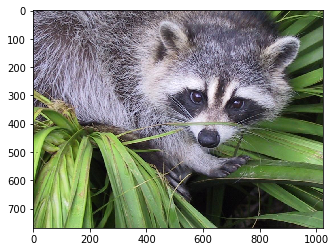

In [19]:
plt.imshow(pic)

Убедитесь, что внутри массива `pic` действительно лежат числа. Выведите первые 10 записей.
Массив состоит из троек чисел, которые характеризуют глубину цвета для каждого пикселя. Из пикселей складывается картинка.

In [20]:
print(pic[:10])

[[[121 112 131]
  [138 129 148]
  [153 144 165]
  ...
  [119 126  74]
  [131 136  82]
  [139 144  90]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]
  ...
  [118 125  71]
  [134 141  87]
  [146 153  99]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]
  ...
  [117 126  71]
  [133 142  87]
  [144 153  98]]

 ...

 [[ 68  68  80]
  [ 70  69  83]
  [ 67  66  80]
  ...
  [117 141  81]
  [120 146  85]
  [123 149  88]]

 [[102 102 114]
  [ 94  94 106]
  [ 85  84  98]
  ...
  [109 137  78]
  [ 98 126  67]
  [ 91 119  60]]

 [[123 123 135]
  [116 116 128]
  [108 108 120]
  ...
  [ 55  84  26]
  [ 47  76  18]
  [ 44  73  15]]]


Выведите значение максимального элемента в матрице. Выведите значение минимального. Выведите среднее по всем элементам матрице. В каких пределах лежат значения глубины цветов?

In [21]:
print(pic.max())
print(pic.min())
print(pic.mean())
print([(channel.max(), channel.min()) for channel in (pic[:,:,0], pic[:,:,1], pic[:,:,2])] )
# dir(pic)
# print(pic.avg())

255
0
110.16274388631184
[(255, 0), (252, 0), (255, 0)]


## Задание 2

Теперь загрузим черно-белое изображение енота, чтобы наш массив был не 3-х мерным тензором, а двумерным массивом. Тензоры обрабатываются точно также, но для простоты пока что давайте работать с двумерными массивами, т.е. матрицами.

In [22]:
pic = misc.face(gray=True)

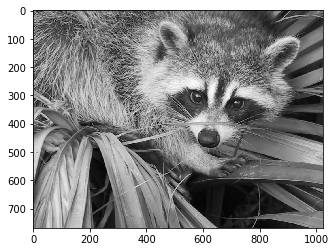

In [23]:
plt.imshow(pic, cmap='gray')

Выведите форму (shape) полученной картинки `pic`. Какие выводы можно сделать? Положите в `h`,`w` высоту и ширину картинки.

In [24]:
print(pic.shape)
h, w = pic.shape

(768, 1024)


Используя библиотеку `numpy`, отразите изображение по горизонтали. Выведите картинку.

Подсказка: не забывайте, что изображения -- это просто двумерные массивы

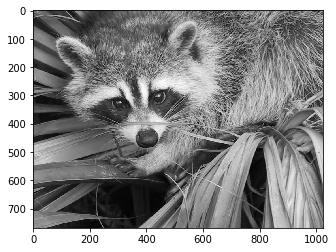

In [25]:
def row_reverse(row):
    return row[::-1]
pic_reverse = np.apply_along_axis(row_reverse, 1, pic)
plt.imshow(pic_reverse, cmap='gray')

Теперь давайте повысим контрастность -- для этого к каждому пикселю прибавим 50 единиц

In [26]:
#тут ваш код
def contrast(pix):
    return min(255, pix+50)
contrast = np.vectorize(contrast)
pic_contr = contrast(pic)
print(pic.dtype)

uint8


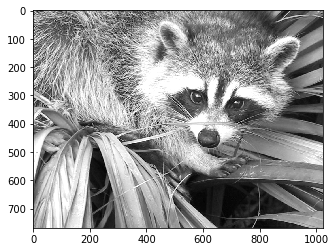

In [27]:
plt.imshow(pic_contr, cmap='gray')

Теперь давайте попробуем превратить наше одноканальное изображение в трехканальный (RGB) тензор. Для этого вместо каждого пикселя в одноканальном изображении (в двумерном массиве) поставим кортеж из трех элементов -- глубины красного, зеленого и голубого соотвественно. Восстановить по ч/б картинке цветной мы не можем, так как мы не можем взять утерянную информацию из ниоткуда, но можем усилить черные и белые участки. Для этого давайте заполним все три канала одинаковыми значениями, деленными на что-то очень большое. Например $--$ на $200$.  То есть, например, если в пикселе `pic[i][j]` лежало значение **200**, то для нового изображения `new_pic` мы заполняем `new_pic[i][j]` кортежем из трех чисел `int(pic[i][j]/3)`. Функция `int` $--$ округление до целой части.

In [28]:
new_pic = np.zeros((h,w,3)) #создадим пустую матрицу, куда будем записывать значения
for i in range(h):
    for j in range(w):
        new_pic[i, j] = 255 - int(pic[i, j])

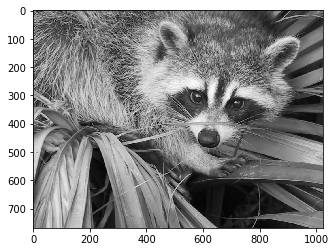

In [29]:
plt.imshow(pic, cmap='gray')

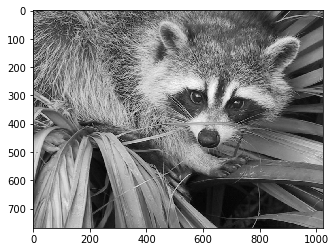

In [30]:
plt.imshow(new_pic)

## Задание 3

Теперь давайте уменьшим качество картинки в 16 раз, путем уменьшения качества изображения, т.е. теперь 16 пикселей по близости надо заполнить одним значением.

In [31]:
from sklearn.datasets import load_sample_image #импорт загрузчика изображения

C:\Users\Ilya\AppData\Roaming\Python\Python35\site-packages\sklearn\datasets\base.py:692: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\Ilya\AppData\Roaming\Python\Python35\site-packages\sklearn\datasets\base.py:692: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


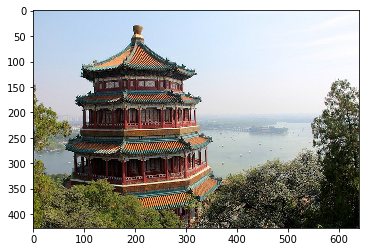

In [32]:
china = load_sample_image('china.jpg')
plt.imshow(china)

Запишите в переменные `h`, `w`, `c` высоту, ширину, количество каналов соответственно для картинки `china`.

In [33]:
h, w, c = china.shape
print(china.shape)

(427, 640, 3)


Теперь давайте непосредственно перейдем к изменению картинки $--$ мы предлагаем разбивать картинки на квадраты 4 на 4 и заполнять все 16 значений внутри квадрата левым верхним значением. Вы можете сделать иначе.

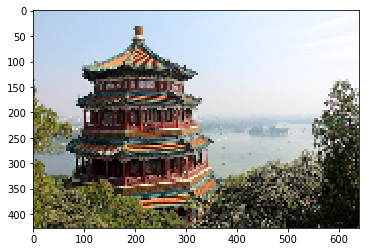

In [39]:
from copy import copy
compressed_pic = copy(china)
indexes = [(x, y) for x in np.arange(0, h, 4) for y in np.arange(0, w, 4)]
for x, y in indexes:
    compressed_pic[x:x+4, y:y+4] = compressed_pic[x, y]
                                                        
plt.imshow(compressed_pic)

Напишите функцию, которая считает несоотвествие между исходной и сжатой картинкой. Запустите ваш код для `compressed_pic`, `china`

In [45]:
print(sum( np.abs(np.array([1, 3, 5]) + np.array([1, 4, 6]))) )

def calculate_mismatch(a,b):
    mismatch = np.sum(np.abs(a-b))
    print(mismatch)
    return mismatch    

20


In [46]:
calculate_mismatch(compressed_pic, china)

81677862


81677862

Посчитайте синус от каждого значения пикселей изображения `china` по всем каналам. Выведите картинку. Используйте функцию `np.sin` 

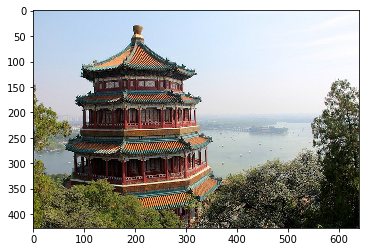

In [64]:
china_norm = china/china.max()
plt.imshow(china_norm) 
china_sin = np.sin(china_norm*np.pi).astype('float32') 

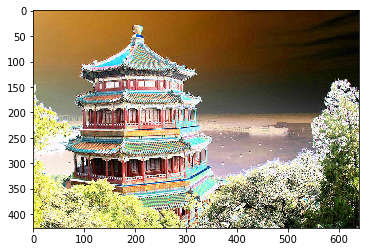

In [65]:
plt.imshow(china_sin) 

Посмотрите на полученный результат. Как вы думаете, что можно делать с помощью такого преобразования? Какого рода объекты можно распознать?

### Задание 4*
это задание является дополнительным

Теперь давайте поработаем с аудиофайлами. Стандартный аудиофайл представляет собой обычный набор чисел, в котором хранятся значения частот, снятых с определенной периодичностью. Итак, самая простая аудиодорожка $-$ одномерный массив.

Первое, что нужно сделать $--$ установить библиотеку для работы с аудио. Она называется `librosa`. Гайд по установке: https://librosa.github.io/librosa/install.html


In [ ]:
import librosa #импортируем библиотеку
import IPython.display

In [ ]:
audio, sr= librosa.load('Test.wav')  
# записываем наш массив звуковых частот в файл аудио, sr -- число точек, записываемых в секунду. 
# чтобы файл открылся, он должен лежать в той же папке, что и файл HW_2.ipynb

Нашу дорожку можно воспроизвести в самом файле `.ipynb`:

In [ ]:
IPython.display.Audio(audio, rate=sr)

Выведите тип данных переменной `audio`, найдите ее длительность и среднее.

In [ ]:
print(#тут ваш код)

    Давайте посмотрим, как выглядит наша дорожка. Для этого используем библиотеку `matplotlib.pyplot`

In [ ]:
plt.figure(figsize=(25,5))
plt.title('Test.wav')
plt.plot(audio)

Обрежьте последние 4 секунды файла

In [ ]:
audio = #тут ваш код

Давайте уменьшим амплитуду на 25%. Что при этом изменится? Напоминаю, что вы всегда можете послушать изменения при помощи `IPython.display.Audio`

In [ ]:
audio = #тут ваш код

А еще аудиодорожку можно ускорить. Для этого попробуйте потюнить параметр `rate`

In [ ]:
IPython.display.Audio(audio, rate=sr)